In [1]:
from math import log, sqrt, pi, exp
from scipy.stats import norm
from datetime import datetime, date
import numpy as np
import pandas as pd
from pandas import DataFrame
import math
from sklearn import metrics
from sklearn.metrics import r2_score
%run function.py

In [3]:
data_30 = pd.read_csv("prcing_by_bsm_challenge.csv")

In [40]:
#a = short_term
#b = a[a['moneyness_ratio'] >= 1.35]

data_eval = data_30

bs_price = 'bs_HV90'

0.007783691596330879
0.06614462292008928
0.8633067869153156


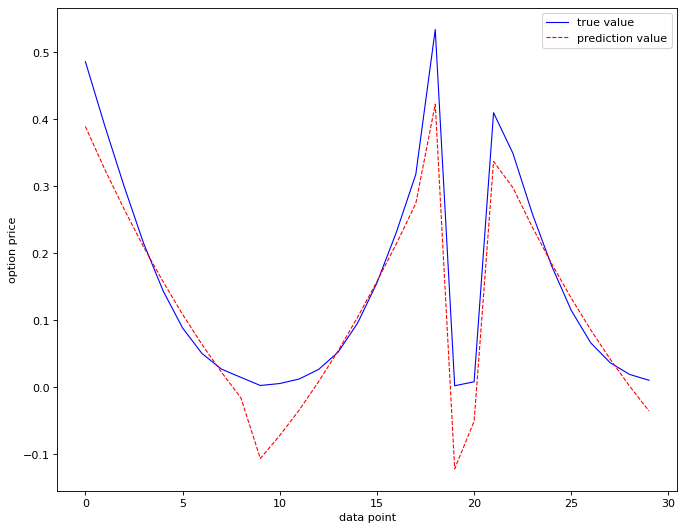

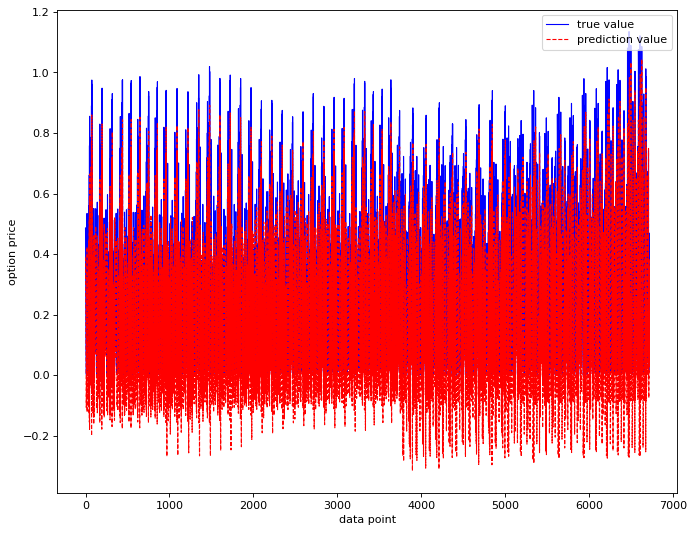

In [41]:
MSE = metrics.mean_squared_error(data_eval['close'], data_eval[bs_price])
MAE = metrics.mean_absolute_error(data_eval['close'], data_eval[bs_price])
r2 = r2_score(data_eval['close'], data_eval[bs_price])

print(MSE)
print(MAE)
print(r2)

prediction_visualization(data_eval['close'], data_eval[bs_price], 30, 0)
prediction_visualization(data_eval['close'], data_eval[bs_price], len(data_eval), 0)

In [42]:
# BS price modification
for i in data_eval.index:
    if data_eval.loc[i, bs_price] < 0:
        data_eval.loc[i, bs_price] = 0

#data_eval.shape

0.004460698499994315
0.04443983049791667
0.9216634930842222


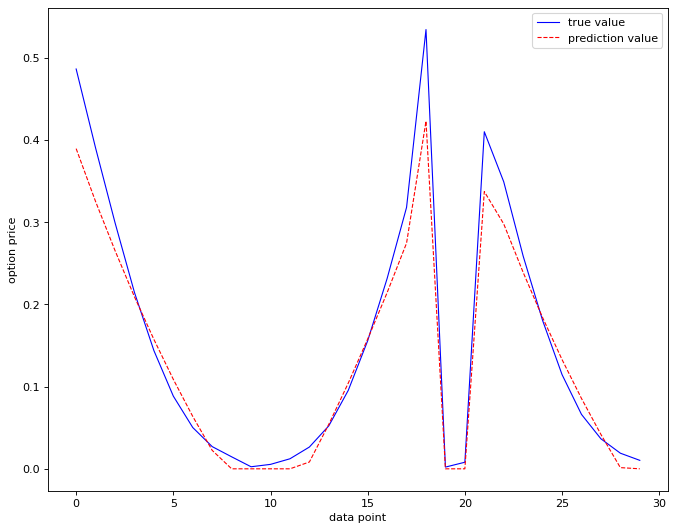

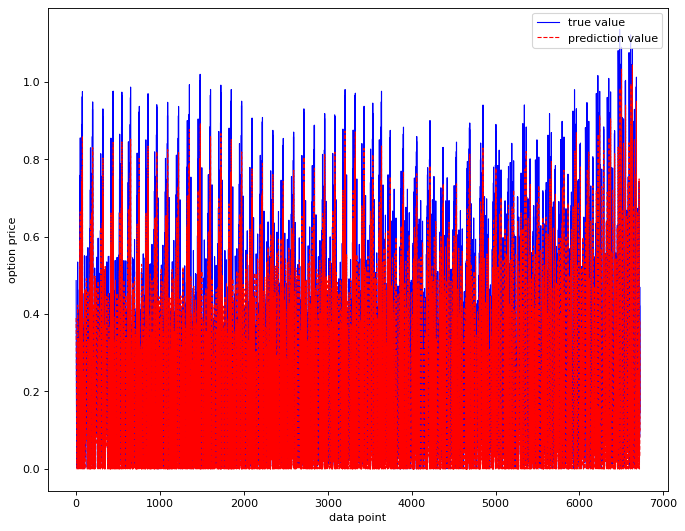

In [43]:
MSE = metrics.mean_squared_error(data_eval['close'], data_eval[bs_price])
MAE = metrics.mean_absolute_error(data_eval['close'], data_eval[bs_price])
r2 = r2_score(data_eval['close'], data_eval[bs_price])

print(MSE)
print(MAE)
print(r2)

prediction_visualization(data_eval['close'], data_eval[bs_price], 30, 0)
prediction_visualization(data_eval['close'], data_eval[bs_price], len(data_eval), 0)

In [44]:
# Separate by performance quantile
ae_bs = abs(data_eval['close'] - data_eval[bs_price])
b = ae_bs.sort_values(ascending = False)
BS_1st_quantile = data_eval.loc[abs(data_eval['close'] - data_eval[bs_price]) <= b.quantile(0.25)]
BS_2nd_quantile = data_eval.loc[(abs(data_eval['close'] - data_eval[bs_price]) > b.quantile(0.25)) & (abs(data_eval['close'] - data_eval[bs_price]) <= b.quantile(0.5))]
BS_3rd_quantile = data_eval.loc[(abs(data_eval['close'] - data_eval[bs_price]) > b.quantile(0.5)) & (abs(data_eval['close'] - data_eval[bs_price]) <= b.quantile(0.75))]
BS_4th_quantile = data_eval.loc[abs(data_eval['close'] - data_eval[bs_price]) > b.quantile(0.75)]

# Separate by esitimation precision
BS_under_average_precision = data_eval.loc[abs(data_eval['close'] - data_eval[bs_price]) > MAE]
BS_above_average_precision = data_eval.loc[abs(data_eval['close'] - data_eval[bs_price]) <= MAE]

0.015735981565379444
0.11311288471768909
0.666894250533352


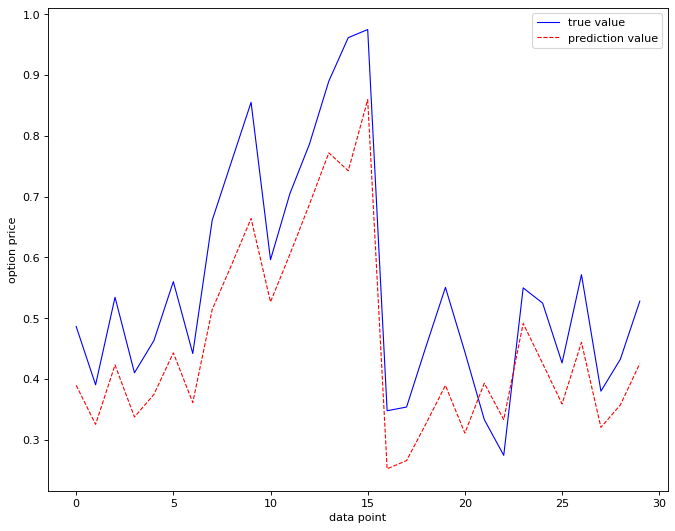

In [45]:
data_eval_by_precision = BS_4th_quantile

MSE = metrics.mean_squared_error(data_eval_by_precision['close'], data_eval_by_precision[bs_price])
MAE = metrics.mean_absolute_error(data_eval_by_precision['close'], data_eval_by_precision[bs_price])
r2 = r2_score(data_eval_by_precision['close'], data_eval_by_precision[bs_price])

print(MSE)
print(MAE)
print(r2)

prediction_visualization(data_eval_by_precision['close'], data_eval_by_precision[bs_price], 30, 0)